In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.metrics import silhouette_score
import joblib

In [5]:
df = pd.read_csv("../data/processed/skill_builder_processed.csv")

C:\Users\Dell\AppData\Local\Temp\ipykernel_5164\231376126.py:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed/skill_builder_processed.csv")


In [6]:
#  Select Numerical Columns for Clustering
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
X = df[numeric_cols]

In [7]:
#  Scale Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#  PCA for Dimensionality Reduction
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [9]:
#  Save Scaler and PCA
joblib.dump(scaler, '../model/scaler.pkl')
joblib.dump(pca, '../model/pca.pkl')

['../model/pca.pkl']

In [10]:
#  Sample for Faster Clustering
sample_df = df.sample(n=5000, random_state=42)
X_sample = sample_df[numeric_cols]
X_sample_scaled = scaler.transform(X_sample)
X_sample_pca = pca.transform(X_sample_scaled)

In [11]:
#  MiniBatchKMeans Clustering
print("\n✅ Silhouette Scores for MiniBatchKMeans:")
for k in range(2, 7):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=10, batch_size=512)
    preds = kmeans.fit_predict(X_sample_pca)
    score = silhouette_score(X_sample_pca, preds)
    print(f"k={k}: {score:.3f}")


✅ Silhouette Scores for MiniBatchKMeans:
k=2: 0.777
k=3: 0.734
k=4: 0.558
k=5: 0.564
k=6: 0.517


In [12]:
#  MiniBatchKMeans Model
best_k = 3
kmeans_model = MiniBatchKMeans(n_clusters=best_k, random_state=42, n_init=10, batch_size=512)
kmeans_labels = kmeans_model.fit_predict(X_sample_pca)

In [13]:
#  Save MiniBatchKMeans Model
joblib.dump(kmeans_model, '../model/kmeans_model.pkl')

['../model/kmeans_model.pkl']

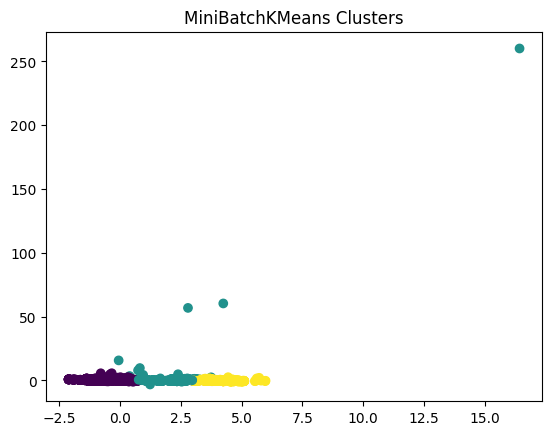

In [14]:
#  KMeans Visualization
plt.scatter(X_sample_pca[:, 0], X_sample_pca[:, 1], c=kmeans_labels)
plt.title('MiniBatchKMeans Clusters')
plt.savefig('../eda/minibatchkmeans_clusters.png')
plt.show()

In [15]:
#  DBSCAN Clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_sample_pca)

#  Save DBSCAN Model
joblib.dump(dbscan_model, '../model/dbscan_model.pkl')

['../model/dbscan_model.pkl']

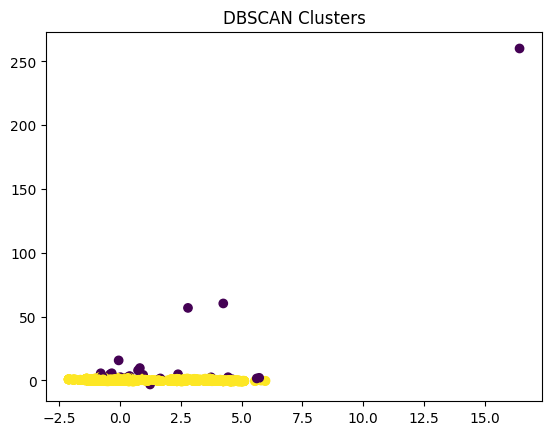


✅ Clustering completed and models saved.


In [16]:
#  DBSCAN Visualization
plt.scatter(X_sample_pca[:, 0], X_sample_pca[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clusters')
plt.savefig('../eda/dbscan_clusters.png')
plt.show()

print("\n✅ Clustering completed and models saved.")
